### INSTALLING AND IMPORTING LIBRARIES


In [1]:
import praw
import os
import pandas as pd
import datetime as dt
import logging
import numpy as np
from numpy import random
import gensim
import nltk
nltk.download('all')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_dat

[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package ppattach to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package produ

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\

### SCRAPPING OF R/INDIA POSTS USING PRAW

## Why I did this?
To scrape the data from the reddit.

In [2]:
reddit = praw.Reddit(client_id='69D-_faFMb67Ww', client_secret='NicR7Ux1OFwOTuN1QDn49wq6itM',username='singhalavanish',password='cookies12', user_agent='singhalavanish')

### DEFINING TYPES OF FLAIR

In [3]:
flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA","Coronavirus"]
len(flairs)

13

### DICTIONARY OF FLAIRS

In [4]:
flair_dict={0:'Political',1:'Non-Political',2:'[R]eddiquette',3:'AskIndia',4:'Science/Technology',5:'Policy/Economy',6:'Finance/Business',7:'Sports',8:'Food',9:'Photography',10:'AMA',11:'Coronavirus'}

### DICTIONARY REPRESENTING KEY WITH EMPLTY LIST

## Why I did this?
Here I have declared an empty list respective to keys and Why I have done this because after cleaning the scraped data we have appended each value to respective keys.

In [5]:
topics_dict = { "title":[], 
                "score":[],
                "flair":[],
                "author":[],
                "id":[], "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}

### APPENDING THE VALUES INTO RESPECTIVE KEYS WHICH ARE RETIREVED 

### RETRIEVING 100 POSTFROM EACH FLAIR FROM R/INDIA PAGE

In [6]:
for submission in reddit.subreddit('India').search('flair:"AMA"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Business/Finance"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Food"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Sports"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Politics"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Science Technology"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Policy Economy"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Photography"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Scheduled"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"[R]eddiquette"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Non-Political"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"AskIndia"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Entertainment"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
for submission in reddit.subreddit('India').search('flair:"Coronavirus"', limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)



### DEFINING THE FUNCTIONS FOR PRE-PROCESSING OF TEXT

## why I did this?
Here,I have defined the function to preprocess a text. I have achieved it by doing converting the scraped title and url and clean it by using regex function.Here we have converted the string to lower case because While dealing with strings we ahve to convert it into lower and finding the pattern and then join them to make a complete sentence.

In [8]:
#REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))
def string_form(value):
    return str(value)

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

## Why I did this?
Here we have appended the data to the list we have created in our dictionary

In [9]:
topics_data = pd.DataFrame(topics_dict)


### ASSIGNING THE DATE AND TIME OF POST

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)

In [11]:
topics_data

,title,score,flair,author,id,url,comms_num,created,body,timestamp
0,"Hi, I’m Dr. Roshan Radhakrishnan, a doctor, an...",811,AMA has Ended,pythoroshan,fk649f,https://i.redd.it/vf1ak8axs8n41.jpg,411,1.584484e+09,,2020-03-18 03:55:19
1,"Hi Reddit, I am Pratik Sinha, Co-founder of Al...",1068,AMA,frthnker,ejes3k,https://www.reddit.com/r/india/comments/ejes3k...,309,1.578083e+09,"(Will continue the AMA tomorrow, around 12 pm ...",2020-01-04 01:58:48
2,I Am An Aam Aadmi Party MLA. Ask Me Anything!,1568,AMA,pankajpushkar,e4i3vq,https://www.reddit.com/r/india/comments/e4i3vq...,431,1.575239e+09,Hello Reddit!\n\nI'm Pankaj Pushkar. I represe...,2019-12-02 04:00:48
3,"Hi Reddit, I'm Aatish Taseer, Ask Me Anything",263,AMA,aatishtaseer,egctcf,https://www.reddit.com/r/india/comments/egctcf...,147,1.577491e+09,[[Taking a break for a shower/hair cut. Will c...,2019-12-28 05:28:01
4,"AMA - K Vaitheeswaran - Jan 25th, 2020",51,AMA,Vaitheek,etpyiu,https://www.reddit.com/r/india/comments/etpyiu...,44,1.579982e+09,Hi Reddit! My name is **K Vaitheeswaran**. I a...,2020-01-26 01:29:44
5,"Hi, I’m Comedian, actor ＆ biscuit lover Vir Da...",406,AMA has Ended,ComedianVirDas,ezm2ic,https://www.reddit.com/r/india/comments/ezm2ic...,465,1.580989e+09,"Hi, I’m Vir Das and I just released my 3rd sta...",2020-02-06 17:00:43
6,"AMA Announcement: Vir Das, an Indian comedian....",191,AMA Announcement,IAmMohit,ezbcy0,https://www.reddit.com/r/india/comments/ezbcy0...,33,1.580946e+09,Greetings [r/India](https://www.reddit.com/r/I...,2020-02-06 05:11:24
7,"Hi Reddit, we're bringing laser based broadban...",277,Casual AMA,hoboskatov,ejt2ok,https://yourstory.com/2020/01/wifi-dabba-start...,132,1.578149e+09,,2020-01-04 20:07:21
8,World Mental Health Day AMA,90,AMA,mentalhealthind,dfgd0x,https://www.reddit.com/r/india/comments/dfgd0x...,123,1.570653e+09,"Hello, we are Bangalore based NGO, [White Swan...",2019-10-10 02:02:38
9,"Hi I'm Ashish Ranjan, national convener of nat...",452,AMA has ended,ashishnapm,ee3636,https://www.reddit.com/r/india/comments/ee3636...,188,1.577036e+09,"Hi I'm Ashish Ranjan, national convener of nat...",2019-12-22 23:08:56


### CONVERTING THE DATAFRAME TO CSV FILE

In [12]:
topics_data.to_csv('../Data/redscrape.csv', index=False) 


### READING CSV FILE WITH PANDAS LIBRARY

In [13]:
df = pd.read_csv("../Data/redscrape.csv")

### TEXT PREPROCESSING AND ASSIGNING VALUE TO NEW COLUMN

In [64]:
df['title'] = df['title'].apply(string_form)
df['body'] = df['body'].apply(string_form)
df['url'] = df['url'].apply(string_form)

df['title'] = df['title'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)
df['url'] = df['url'].apply(clean_text)

feature_combine = df["title"] + df["url"] 
df = df.assign(feature_combine = feature_combine)

In [65]:
df.head()

,title,score,flair,author,id,url,comms_num,created,body,timestamp,feature_combine
0,hi i m dr roshan radhakrishnan a doctor and an...,811,AMA has Ended,pythoroshan,fk649f,https i redd it vf ak axs n jpg,411,1.584484e+09,nan,2020-03-18 03:55:19,hi i m dr roshan radhakrishnan a doctor and an...
1,hi reddit i am pratik sinha co founder of alt ...,1068,AMA,frthnker,ejes3k,https www reddit com r india comments ejes k h...,309,1.578083e+09,will continue the ama tomorrow around pm ist h...,2020-01-04 01:58:48,hi reddit i am pratik sinha co founder of alt ...
2,i am an aam aadmi party mla ask me anything,1568,AMA,pankajpushkar,e4i3vq,https www reddit com r india comments e i vq i...,431,1.575239e+09,hello reddit im pankaj pushkar i represent tim...,2019-12-02 04:00:48,i am an aam aadmi party mla ask me anythinghtt...
3,hi reddit im aatish taseer ask me anything,263,AMA,aatishtaseer,egctcf,https www reddit com r india comments egctcf h...,147,1.577491e+09,taking a break for a shower hair cut will chec...,2019-12-28 05:28:01,hi reddit im aatish taseer ask me anythinghttp...
4,ama k vaitheeswaran jan th,51,AMA,Vaitheek,etpyiu,https www reddit com r india comments etpyiu a...,44,1.579982e+09,hi reddit my name is k vaitheeswaran i am an e...,2020-01-26 01:29:44,ama k vaitheeswaran jan thhttps www reddit com...


In [66]:
df['feature_combine'][1]

'hi reddit i am pratik sinha co founder of alt news ask me anythinghttps www reddit com r india comments ejes k hi reddit i am pratik sinha cofounder of alt news'

### GETTING NUMBER OF ROWS IN EACH COLUMN

## Need?
To know the number of rows each column hold.


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3365 entries, 0 to 3364
Data columns (total 11 columns):
title              3365 non-null object
score              3365 non-null int64
flair              3365 non-null object
author             3365 non-null object
id                 3365 non-null object
url                3365 non-null object
comms_num          3365 non-null int64
created            3365 non-null float64
body               3365 non-null object
timestamp          3365 non-null object
feature_combine    3365 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 475.5+ KB


### ANALYSIS OF DATAFRAME 


## Why?
Stats are very imortant for every data so to know the total analysis of data.

In [18]:
df.describe()

,score,comms_num,created
count,3365.000000,3365.000000,3.365000e+03
mean,285.040119,160.197920,1.568056e+09
std,806.442223,432.928951,3.588492e+07
min,0.000000,0.000000,1.373235e+09
25%,21.000000,8.000000,1.571596e+09
50%,73.000000,28.000000,1.583001e+09
75%,222.000000,93.000000,1.585844e+09
max,19711.000000,8377.000000,1.586888e+09


### REMOVING/DROPPING THE NAN ROWS IN FLAIR COLUMN

## Why?
Here we are droopping the rows which have nan as value in the column name flair.It will help the model to predict accurately.

In [49]:
df = df[df['flair'].notna()]
df = df[df['body'].notna()]
df = df[df['title'].notna()]
df = df[df['score'].notna()]
df = df[df['url'].notna()]

### FINDING THE CORRELATION BETWEEN THE INPUT FACTORS IN DATAFRAME

## Why?
I have tried this to know the important kinput factors which will help as features.

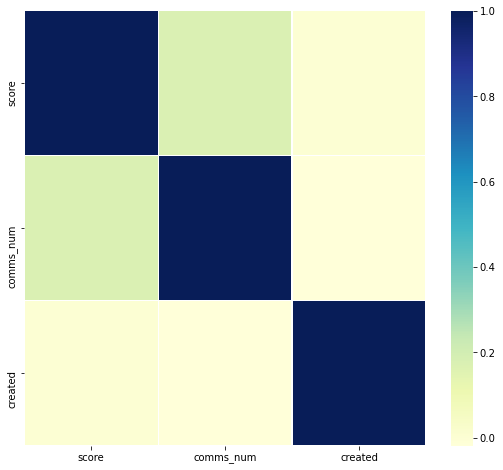

In [50]:
import seaborn as sns 

corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

### EXTRACTING THE UNIQUES FLAIRS DEFINED IN DATAFRAME

In [51]:
uniqueflair = df['flair'].unique()
uniqueflair


array(['AMA has Ended', 'AMA', 'AMA Announcement', 'Casual AMA',
       'AMA has ended', 'AMA Has Ended', 'AMA / Unverified',
       'AMA Announcement ', 'Unverified AMA', 'Casual AMA - Unverified',
       'Unverified - Casual AMA ', 'AMA Concluded', 'Casual AMA 9¾/10',
       'AMA is over', 'AMA is over.', 'Business/Finance', 'Food',
       'Sports', 'Politics', 'Politics [Megathread]',
       'Science/Technology', 'Policy/Economy',
       'Policy/Economy [Megathread]', 'Photography', 'Scheduled',
       '[R]eddiquette', 'Non-Political', 'AskIndia', 'Entertainment',
       'Coronavirus'], dtype=object)

### Detecting Outliers

## Why?
I have done this to know which value of score column is not needed, and where the most of the value lies.

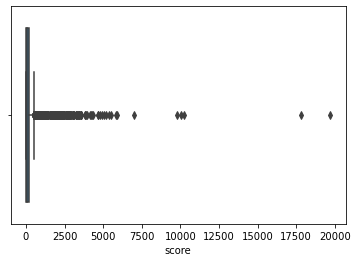

In [52]:
sns.boxplot(x=df['score'])

### VISUALISATION OF FLAIR WITH NUMBER OF POSTS

## Need?
It is done so, a developer know how many post are posted under each flair on this particular page. It will help in jif we are using weights.

Text(0.5, 0, 'flairs')

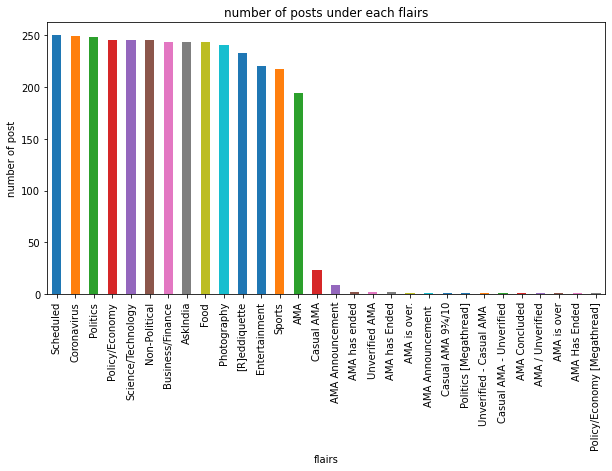

In [53]:
df.flair.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("number of posts under each flairs")
plt.ylabel("number of post")
plt.xlabel("flairs")

### APPENDING UNIQUE FLAIR IN LIST

In [54]:
flairlist = list(df['flair'].unique())
flairlist

['AMA has Ended',
 'AMA',
 'AMA Announcement',
 'Casual AMA',
 'AMA has ended',
 'AMA Has Ended',
 'AMA / Unverified',
 'AMA Announcement ',
 'Unverified AMA',
 'Casual AMA - Unverified',
 'Unverified - Casual AMA ',
 'AMA Concluded',
 'Casual AMA 9¾/10',
 'AMA is over',
 'AMA is over.',
 'Business/Finance',
 'Food',
 'Sports',
 'Politics',
 'Politics [Megathread]',
 'Science/Technology',
 'Policy/Economy',
 'Policy/Economy [Megathread]',
 'Photography',
 'Scheduled',
 '[R]eddiquette',
 'Non-Political',
 'AskIndia',
 'Entertainment',
 'Coronavirus']

### EACH FLAIR DESCRIPTION

## Need?
It is needed, so as to know what are stats of each flair.

In [55]:
for t in flairlist:
    for i in range(1):
        i = df.loc[df['flair'] == t]
        print(t)
        print(i.describe())


AMA has Ended
            score   comms_num       created
count    2.000000    2.000000  2.000000e+00
mean   608.500000  438.000000  1.582736e+09
std    286.378246   38.183766  2.471533e+06
min    406.000000  411.000000  1.580989e+09
25%    507.250000  424.500000  1.581862e+09
50%    608.500000  438.000000  1.582736e+09
75%    709.750000  451.500000  1.583610e+09
max    811.000000  465.000000  1.584484e+09
AMA
             score    comms_num       created
count   194.000000   194.000000  1.940000e+02
mean    190.298969   212.262887  1.468067e+09
std     214.759495   168.817245  4.369489e+07
min      24.000000    10.000000  1.373235e+09
25%      80.000000   103.000000  1.435034e+09
50%     128.500000   171.000000  1.467670e+09
75%     208.500000   274.750000  1.494654e+09
max    1605.000000  1337.000000  1.579982e+09
AMA Announcement
            score  comms_num       created
count    9.000000   9.000000  9.000000e+00
mean   145.555556  12.111111  1.578809e+09
std     91.608012  12.1598

### WORDS VS COUNT PLOT

## Why?
I have plot this because to know what are the most used words, when a user writes a post we can use it for our model making accurate and more descriptive.

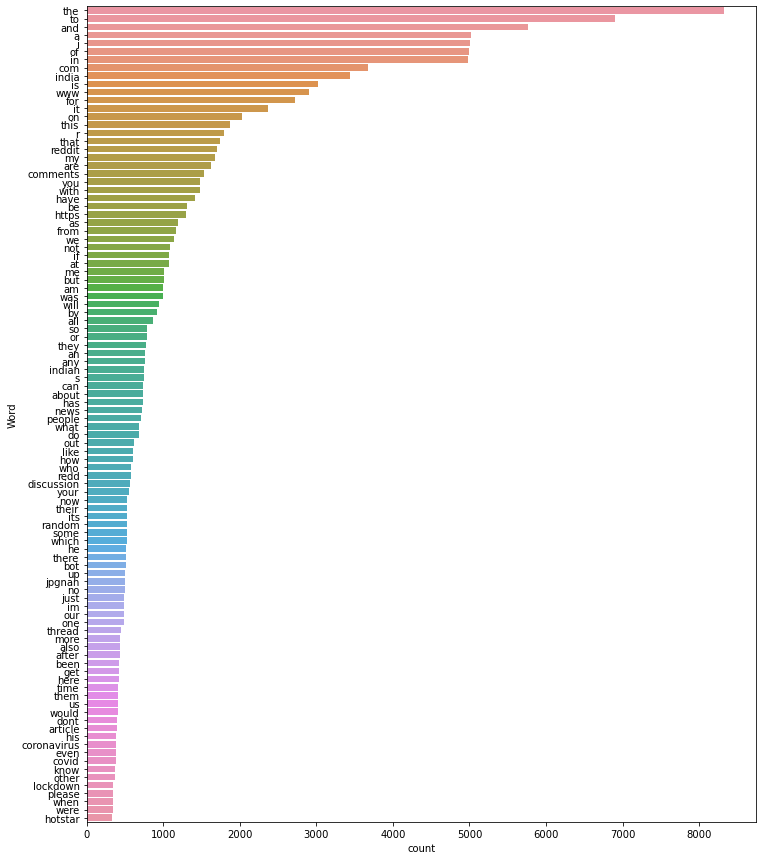

In [56]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
    # print 100 most frequent words 
freq_words(df['feature_combine'], 100)

### ASSIGNING THE FEATURES AND TARGETS

In [57]:
features = df['feature_combine']
target = df['flair']


# NAIVE BAYES CLASSIFIER

## What I Did?
I have built a Naive Bayes classifier.In this I have made a pipeline which is performing fuctions such as Vectorization,as well as we have used multibninomial mode of naive bayes since we have more information to predict not only one.

In [58]:
def nb_classifier(X_train, X_test, Y_train, Y_test):

    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import TfidfTransformer

    nb = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB()),
                  ])
    nb.fit(X_train, Y_train)

    #%%time
    from sklearn.metrics import classification_report
    y_pred = nb.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))


## Random Forest

In [59]:
def randomforest(X_train, X_test, Y_train, Y_test):
  
    from sklearn.ensemble import RandomForestClassifier

    ranfor = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 1500, random_state = 42)),
                 ])
    ranfor.fit(X_train, Y_train)

    y_pred = ranfor.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

## Logistic Regression

In [60]:
def logisticreg(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression

    logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
    logreg.fit(X_train, Y_train)

    y_pred = logreg.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

### SVM CLASSIFIER

## What I Did?
Here I have built an Linear SVM performing all 3 fuctions that i have performed in above model as this is used in nlp because we cannot directly process on string.

In [61]:

# linear svm
def linear_svm(X_train, X_test, Y_train, Y_test):

    from sklearn.linear_model import SGDClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt


    sgd = Pipeline([('vect', TfidfVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),
                   ])
    sgd.fit(X_train, Y_train)



    y_pred = sgd.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

    #confusion matrix between actual and predicted value
    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(Y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))


    #fig = plt.figure(figsize=(8,6))
    df.groupby('flair').title.count().plot.bar(ylim=0)
    plt.show()


    import seaborn as sns
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### DEFINING THE TRAIN AND TEST FEATURES AND TARGETS

## what I did here?
Here I have called a function defined above that is naive bayes and linear svm and made a classification report of each.
It is better to know our model holds what accuracy on each flair while processing.



In [62]:
def train_test(X,Y):
 
    X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.3,random_state = 42)

    print("Results of Naive Bayes Classifier")
    nb_classifier(X_train, X_test, Y_train, Y_test)
    print("Results of Linear Support Vector Machine")
    linear_svm(X_train, X_test, Y_train, Y_test)
    print("Results of Logistic Regression")
    logisticreg(X_train, X_test, Y_train, Y_test)
    print("Results of Random Forest")
    randomforest(X_train, X_test, Y_train, Y_test)
    
    

Flair Detection using Title as Feature
Results of Naive Bayes Classifier
accuracy 0.44554455445544555


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                             precision    recall  f1-score   support

                        AMA       0.83      0.57      0.67        69
           AMA Announcement       0.00      0.00      0.00         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.18      1.00      0.30        65
           Business/Finance       0.67      0.24      0.35        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.56      0.60      0.58        80
              Entertainment       0.75      0.26      0.38        70
                       Food       0.67      0.32      0.43        69
              Non-Political      

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


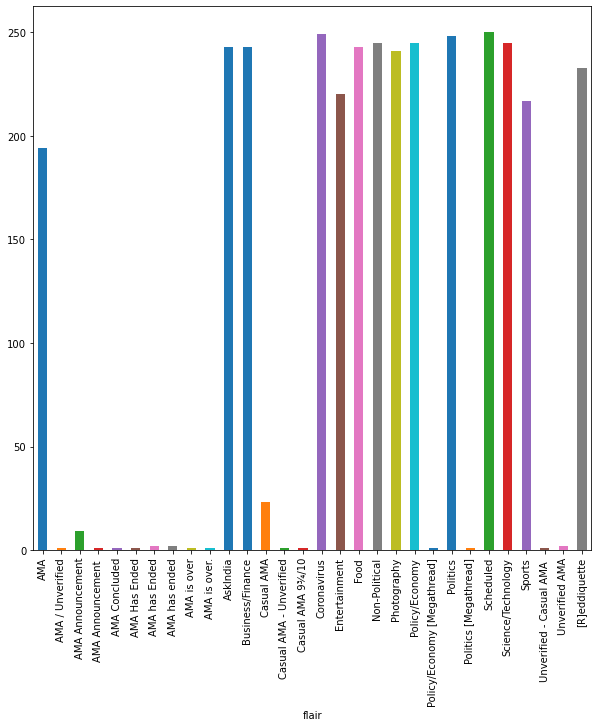

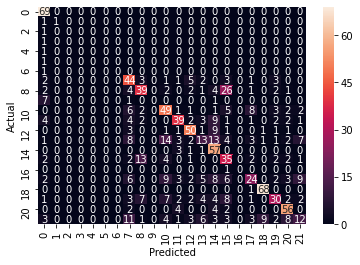

Results of Logistic Regression


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5821782178217821
                             precision    recall  f1-score   support

                        AMA       0.78      0.99      0.87        69
           AMA Announcement       0.50      0.50      0.50         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.48      0.66      0.56        65
           Business/Finance       0.57      0.40      0.47        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.53      0.59      0.56        80
              Entertainment       0.63      0.59      0.61        70
                       Food       0.58      0.65      0.62        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5188118811881188
                             precision    recall  f1-score   support

                        AMA       0.76      1.00      0.86        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.34      0.92      0.50        65
           Business/Finance       0.60      0.44      0.51        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.44      0.68      0.53        80
              Entertainment       0.54      0.54      0.54        70
                       Food       0.42      0.32      0.36        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.44554455445544555
                             precision    recall  f1-score   support

                        AMA       0.83      0.57      0.67        69
           AMA Announcement       0.00      0.00      0.00         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.18      1.00      0.30        65
           Business/Finance       0.67      0.24      0.35        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.56      0.60      0.58        80
              Entertainment       0.75      0.26      0.38        70
                       Food       0.67      0.32      0.43        69
    

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5801980198019802
                             precision    recall  f1-score   support

                        AMA       0.70      1.00      0.82        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.47      0.68      0.55        65
           Business/Finance       0.58      0.46      0.52        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.54      0.61      0.57        80
              Entertainment       0.67      0.56      0.61        70
                       Food       0.70      0.72      0.71        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


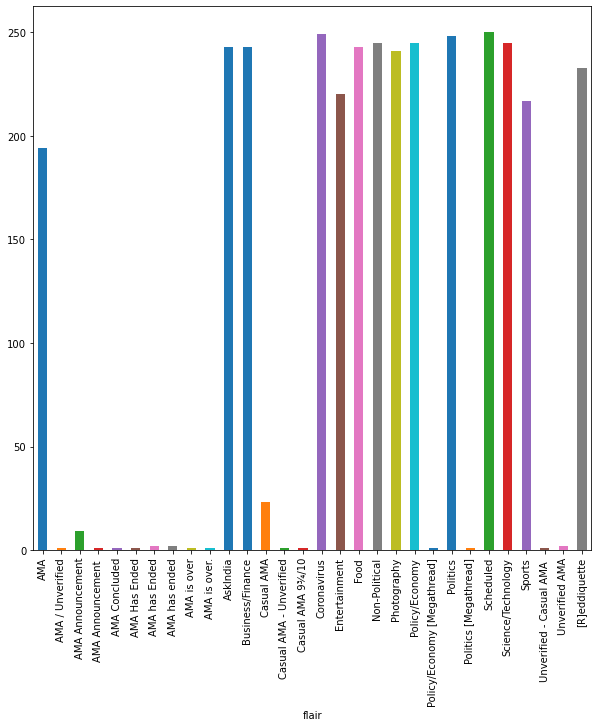

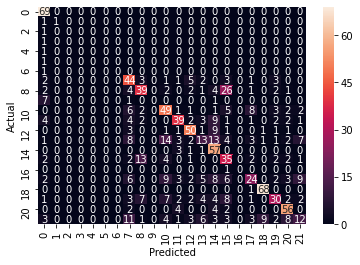

Results of Logistic Regression


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5821782178217821
                             precision    recall  f1-score   support

                        AMA       0.78      0.99      0.87        69
           AMA Announcement       0.50      0.50      0.50         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.48      0.66      0.56        65
           Business/Finance       0.57      0.40      0.47        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.53      0.59      0.56        80
              Entertainment       0.63      0.59      0.61        70
                       Food       0.58      0.65      0.62        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5188118811881188
                             precision    recall  f1-score   support

                        AMA       0.76      1.00      0.86        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.34      0.92      0.50        65
           Business/Finance       0.60      0.44      0.51        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.44      0.68      0.53        80
              Entertainment       0.54      0.54      0.54        70
                       Food       0.42      0.32      0.36        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.44554455445544555
                             precision    recall  f1-score   support

                        AMA       0.83      0.57      0.67        69
           AMA Announcement       0.00      0.00      0.00         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.18      1.00      0.30        65
           Business/Finance       0.67      0.24      0.35        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.56      0.60      0.58        80
              Entertainment       0.75      0.26      0.38        70
                       Food       0.67      0.32      0.43        69
    

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5801980198019802
                             precision    recall  f1-score   support

                        AMA       0.70      1.00      0.82        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.47      0.68      0.55        65
           Business/Finance       0.58      0.46      0.52        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.54      0.61      0.57        80
              Entertainment       0.67      0.56      0.61        70
                       Food       0.70      0.72      0.71        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


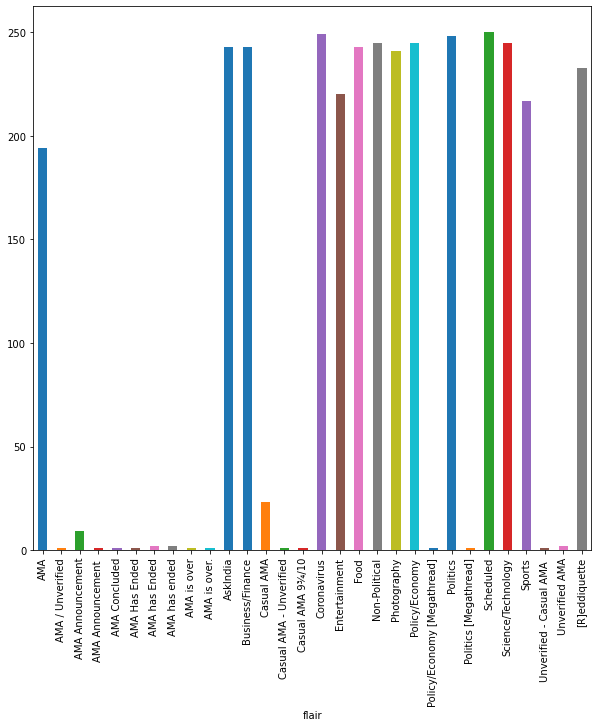

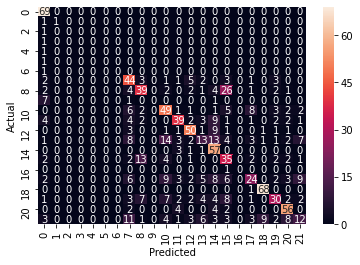

Results of Logistic Regression


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5821782178217821
                             precision    recall  f1-score   support

                        AMA       0.78      0.99      0.87        69
           AMA Announcement       0.50      0.50      0.50         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.48      0.66      0.56        65
           Business/Finance       0.57      0.40      0.47        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.53      0.59      0.56        80
              Entertainment       0.63      0.59      0.61        70
                       Food       0.58      0.65      0.62        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5188118811881188
                             precision    recall  f1-score   support

                        AMA       0.76      1.00      0.86        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.34      0.92      0.50        65
           Business/Finance       0.60      0.44      0.51        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.44      0.68      0.53        80
              Entertainment       0.54      0.54      0.54        70
                       Food       0.42      0.32      0.36        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.44554455445544555
                             precision    recall  f1-score   support

                        AMA       0.83      0.57      0.67        69
           AMA Announcement       0.00      0.00      0.00         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.18      1.00      0.30        65
           Business/Finance       0.67      0.24      0.35        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.56      0.60      0.58        80
              Entertainment       0.75      0.26      0.38        70
                       Food       0.67      0.32      0.43        69
    

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5801980198019802
                             precision    recall  f1-score   support

                        AMA       0.70      1.00      0.82        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.47      0.68      0.55        65
           Business/Finance       0.58      0.46      0.52        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.54      0.61      0.57        80
              Entertainment       0.67      0.56      0.61        70
                       Food       0.70      0.72      0.71        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


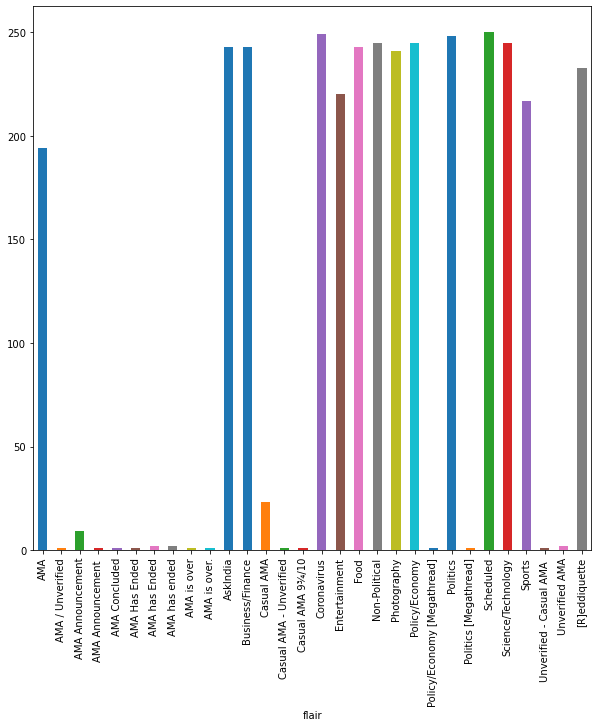

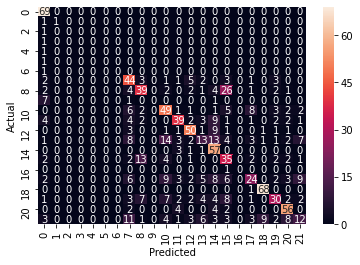

Results of Logistic Regression


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5821782178217821
                             precision    recall  f1-score   support

                        AMA       0.78      0.99      0.87        69
           AMA Announcement       0.50      0.50      0.50         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.48      0.66      0.56        65
           Business/Finance       0.57      0.40      0.47        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.53      0.59      0.56        80
              Entertainment       0.63      0.59      0.61        70
                       Food       0.58      0.65      0.62        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5188118811881188
                             precision    recall  f1-score   support

                        AMA       0.76      1.00      0.86        69
           AMA Announcement       1.00      0.50      0.67         2
          AMA Announcement        0.00      0.00      0.00         1
              AMA has Ended       0.00      0.00      0.00         1
              AMA has ended       0.00      0.00      0.00         1
                AMA is over       0.00      0.00      0.00         1
               AMA is over.       0.00      0.00      0.00         1
                   AskIndia       0.34      0.92      0.50        65
           Business/Finance       0.60      0.44      0.51        84
                 Casual AMA       0.00      0.00      0.00         9
                Coronavirus       0.44      0.68      0.53        80
              Entertainment       0.54      0.54      0.54        70
                       Food       0.42      0.32      0.36        69
     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
X = df['title']
Y = df['body']
Z = df['url']
features = df['feature_combine']
target = df['flair']

print("Flair Detection using Title as Feature")
train_test(X,target)
print("Flair Detection using Body as Feature")
train_test(Y,target)
print("Flair Detection using URL as Feature")
train_test(Z,target)
print("Flair Detection using Title+URL  as Feature")
train_test(features,target)

### SAVING THE MODEL USING PICKLE

### finally I have Saved my model with the Linear svm classifier as it holds better accuracy 

In [171]:
import pickle

#Pkl_Filename = "../Model/finalmodels.pkl"  

#with open(Pkl_Filename, 'wb') as file:  
#    pickle.dump(sgd, file)

In [172]:
filename = '../Model/finalized_model.sav'
pickle.dump(sgd, open(filename, 'wb'))